In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

df = pd.read_csv('https://raw.githubusercontent.com/Gabriel-datapy/Unidades_de_Saude_MG-/master/ubs_funcionamentonone.csv.csv')

In [153]:
df_clean = df[['lat','long','cidade','uf']].dropna()
df_clean.columns = ['Latitude','Longitude','Cidade','Estado'].copy()

df_clean.head()

,Latitude,Longitude,Cidade,Estado
0,-21.132047,-42.361075,Muriaé,MG
1,-22.538527,-54.451268,Vicentina,MS
2,-13.687323,-39.474864,Wenceslau Guimarães,BA
3,-22.933263,-42.411625,Saquarema,RJ
4,-8.360864,-40.358877,Santa Cruz,PE


In [139]:
#Determinando o número de UBS por estado

ubs_estados = df_clean['Estado'].value_counts()
ubs_estados.head()

MG    5118
SP    4769
BA    3684
PE    2400
PR    2310
Name: Estado, dtype: int64

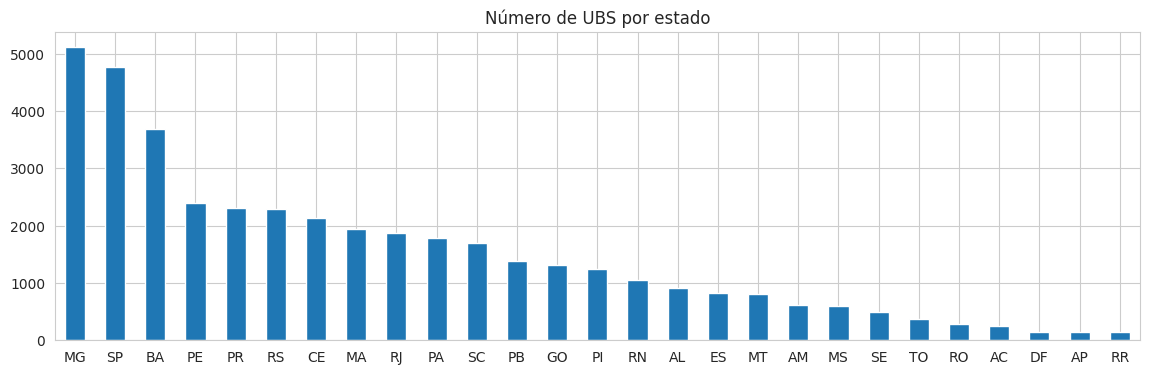

In [140]:
sns.set_style('whitegrid')
ubs_estados.plot.bar(figsize=(14,4),rot=0,title='Número de UBS por estado')

plt.show()

In [0]:
#Determinando o número de UBS por município do estado de Minas Gerais

ubs_MG = df_clean[df_clean['Estado']=='MG']
ubs_municipio = ubs_MG['Cidade'].value_counts()

ubs_municipio = ubs_municipio.to_frame()
ubs_municipio['Cidade'].sort_values()

ubs_20municipios = ubs_municipio['Cidade'].nlargest(20)

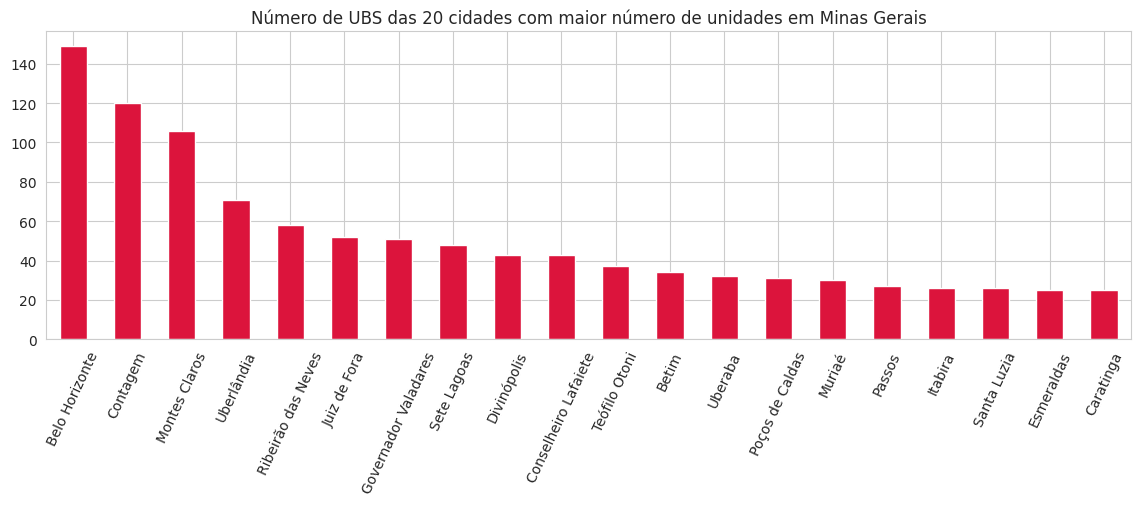

In [152]:
sns.set_style('whitegrid')
ubs_20municipios.plot.bar(figsize=(14,4),rot=65,color='crimson',
                          title='Número de UBS das 20 cidades com maior número de unidades em Minas Gerais')

plt.show()